In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Note to graders: Only Max Kim (gk1473) did most of the work for this project. Kevin Zheng (kjz233) helped out for function 1 and 2. 

# Introduction

The goal of this sprint is to perform simple exploratory data analysis of the MNIST dataset,
which is a set of matricies that are the the grayscale pixel values of handwritten digits and then
the label which is the number the digit actually is.

You are going to implement various functions responsible for returning information about the dataset.
Each function will have the inputs specified and what each input is supposed to be as well as the specificed 
intended output.
You will then have to plot results from the function in various ways to visualize your findings.


### Each function you have to implement is worth 20 points.
### There will be a total of 100 points.
### The 6th function to implement is extra credit worth 20 points

In [3]:
def least_common_digit(x_set, y_set):
    '''
       Input: x_set, the x values of the dataset and y_set, the y values of the  dataset
       Expected Output: The image from the x set of the least common digit.
    '''
    least_common = Counter(y_set).most_common()[-1][0]
    for i,num in enumerate(y_set):
        if num == least_common:
            return x_set[i]

        
lc_train = least_common_digit(x_train, y_train)
lc_test = least_common_digit(x_test, y_test)

In [4]:
def most_common_digit(x_set, y_set):
    '''
       Input: x_set, the x values of the dataset and y_set, the y values of the  dataset
       Expected Output: The image from the x set of the most common digit.
    '''
    most_common = Counter(y_set).most_common()[0][0]
    for i,num in enumerate(y_set):
        if num == most_common:
            return x_set[i]

    
mc_train = most_common_digit(x_train, y_train)
mc_test = most_common_digit(x_test, y_test)

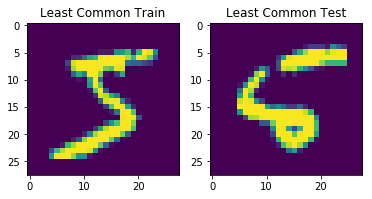

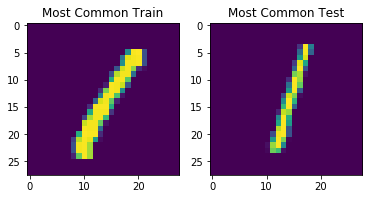

In [5]:

def plot_two(im1, title1, im2, title2):
    '''
        Input: im1, a matrix representing a grayscale image and title1 a string,im2 a matrix representing 
        a grayscale image and title2 a string
        Expected Output: A tuple (fig, ax) representing a generated figure from matplotlib and two subplots 
        ready to display the inputed images with the given titles
    '''
    fig, ax = plt.subplots(1, 2)
    
    ax[0].imshow(im1)
    ax[0].set_title(title1)
    
    ax[1].imshow(im2)
    ax[1].set_title(title2)
    
    ax[0].plot()
    ax[1].plot()

    return (fig, ax)

plot_two(lc_train, 'Least Common Train', lc_test, 'Least Common Test'), plot_two(mc_train, 'Most Common Train', mc_test, 'Most Common Test')
plt.show()

In [6]:
def how_many_of_each_digit(y_set):
    '''
       Input: y_set, the y values of the training set
       Expected Output: A dict of the count of each digit in the set
    '''
    vals_by_count = sorted(Counter(y_set).most_common(), key=lambda tup: tup[0])
    return vals_by_count

count_train = how_many_of_each_digit(y_train)
count_test = how_many_of_each_digit(y_test)

In [7]:

def bar_chart(train, test):
    '''
    Inputs: train, a dictionary of count of each digit of the training set and test, a dictionary of the count
    of each digit for the test set
    Expected Output: A tuple (fig, ax) ready to show using matplotlib
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15,10))
    
    #create train set subplot
    train_x_values = [tup[0] for tup in train]
    train_y_values = [tup[1] for tup in train]
    train_y_pos = np.arange(len(train_x_values))
    
    ax[0].bar(train_y_pos, train_y_values, color='r')
    ax[0].set_xticks(train_y_pos, train_y_values)
    ax[0].xaxis.set_ticks(train_x_values)
    ax[0].set_title("Train Count vs. Digit")
    ax[0].set_xlabel("Digit")
    ax[0].set_ylabel("Count")
    
    #create test set subplot
    test_x_values = [tup[0] for tup in test]
    test_y_values = [tup[1] for tup in test]
    test_y_pos = np.arange(len(test_x_values))
    
    ax[1].bar(test_y_pos, test_y_values, color='b')
    ax[1].set_xticks(test_y_pos, test_y_values)
    ax[1].xaxis.set_ticks(test_x_values)
    ax[1].set_title("Test Count vs. Digit")
    ax[1].set_xlabel("Digit")
    ax[1].set_ylabel("Count")
    
    fig.subplots_adjust(wspace=.5)
    
    return (fig, ax)


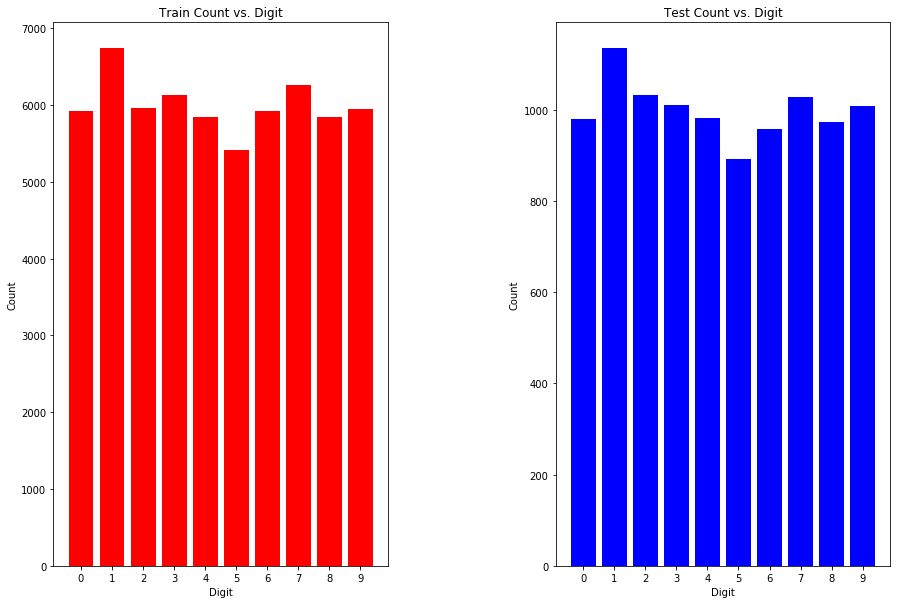

In [8]:
fig, chart = bar_chart(count_train, count_test)
plt.show()

## Finally for extra credit after doing the small data explorations above, using the data provided here or if you are feeling particularly fancy download a dataset from somewhere and make an interesting visualization of something you think would be important to know if you were exploring this dataset in a real world setting.

### This is extra credit and worth 20points.

# Note to graders: Only Max Kim (gk1473) did most of the work for this project. Kevin Zheng (kjz233) helped out for function 1 and 2.

In [9]:
def interesting_visualization(train, test):
    '''
        Fill in this code block with your interesting visualization if you want the extra credit
        Expected Input: A dict of the count of each digit in the train and test set
        Expected Output: A pie chart representing the percentage of each digit in each set. 
                         The most frequent digit will be highlighted. 
        Implemented solo by Max Kim (gk1473). 
    '''
    
    labels = [tup[0] for tup in train]
    train_sizes = [tup[1] for tup in train]
    test_sizes = [tup[1] for tup in test]
    
    fig, ax = plt.subplots(1, 2, figsize=(10,10))
    
    #find the most frequent digit in both sets
    highest_train_index = train_sizes.index(max(train_sizes))
    highest_test_index = test_sizes.index(max(test_sizes))
    
    train_explode_array = [0] * len(labels)
    test_explode_array = [0] * len(labels)
    
    train_explode_array[highest_train_index] = 0.2
    test_explode_array[highest_test_index] = 0.2
    
    #create pie chart for train set
    ax[0].pie(train_sizes, labels=labels, explode=train_explode_array, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[0].set_title("Pie chart for frequency of digits in train set", color='red')
    ax[0].axis('equal')
    
    #create pie chart for test set
    ax[1].pie(test_sizes, labels=labels, explode=test_explode_array, autopct='%1.1f%%', shadow=True, startangle=90)
    ax[1].set_title("Pie chart for frequency of digits in test set", color='blue')
    ax[1].axis('equal') 
    
    return (fig, ax)

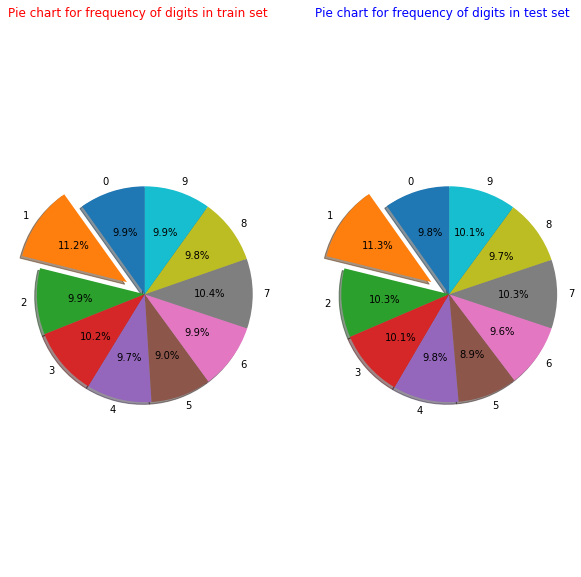

In [10]:
#remember to set the arguments for your visualization if you need to
fig, chart = interesting_visualization(count_train, count_test)
plt.show()